# Implementar la solución del circuito siguiente en python:

<img src="img/Rl.png" width="400" />

Para observar mejor el comportamiento del circuito usaremos 3 valores diferentes de resistencias para ver como afectan el rendimiento de la corriente del inductor:

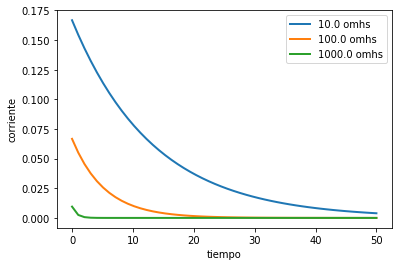

In [26]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#definir nuestra ecuación diferencial
def di_dt(y,t,r):
    didt=-y*(50+ r)/800
    return didt
#condiciones iniciales
t = np.linspace(0,50)
res=[10.0,100.0,1000.0]
y0=[] 
for x in res:
    z=10/(50+x)
    y0.append(z)
            
k=len(y0)
#resolver la ecuación
for i in range(k):
    r=res[i]
    p=y0[i]
    ysol= odeint(di_dt,p,t,args=(r,))
    plt.plot(t,ysol,linewidth=2,label='%.1f omhs'%r)
#graficar solución
plt.xlabel('tiempo')
plt.ylabel('corriente')
plt.legend()
plt.show()

## Ahora usaremos diferentes valores de inductancia para un valor R=10 k $\Omega$


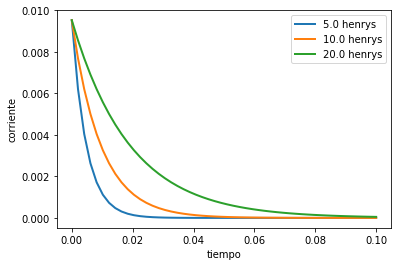

In [25]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#definir nuestra ecuación diferencial
def di_dt(y,t,l):
    didt=-y*(50+ 1000)/l
    return didt
#condiciones iniciales
t = np.linspace(0,0.1)
induct=[5.0,10.0,20.0]
y0=1/105
            
k=len(induct)
#resolver la ecuación
for i in range(k):
    l=induct[i]
    ysol= odeint(di_dt,y0,t,args=(l,))
    plt.plot(t,ysol,linewidth=2,label='%.1f henrys' %l)
#graficar solución
plt.xlabel('tiempo')
plt.ylabel('corriente')
plt.legend()
plt.show()

Debido a que las condiciones iniciales sólo dependen de la resistencia del circuito, todas nuestras soluciones parten de un mismo punto, y se puede ver que a mayor inductancia será mayor el tiempo de descarga de la corriente del inductor.

# Circuito RC en python

<img src="img/RC.png" width="400" />

se implementará la solución a este circuito en python, con una capacitancia fija de 100$\mu$ F

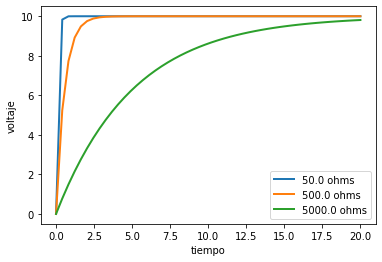

In [4]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dv_dt(v,t,r):
    dvdt=(10-v)/(0.001*(50+r))
    return dvdt

t = np.linspace(0,20)
res = [50,500,5000]
v0= 0
k= len(res)

for x in range(k):
    r = res[x]
    vsol= odeint(dv_dt,v0,t,args= (r,))
    plt.plot(t,vsol,linewidth=2,label='%.1f ohms'%r)
  
plt.xlabel('tiempo')
plt.ylabel('voltaje')
plt.legend()
plt.show()



## Ahora se introducirán diferentes valores de capacitancia para un valor fijo de 1k$\Omega $

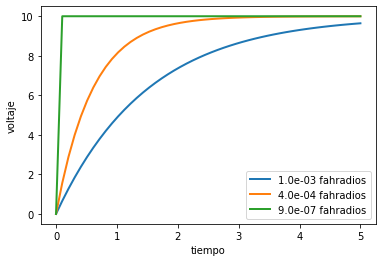

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dv_dt(v,t,c):
    dvdt=(10-v)/(1500*c)
    return dvdt
t= np.linspace(0,5)
v0=0
cap=[1e-3,400*10**-6,900*10**-9]
k=len(cap)

for x in range(k):
    c=cap[x]
    vsol = odeint(dv_dt,v0,t,args=(c,))
    plt.plot(t,vsol,linewidth=2,label='%.1e fahradios'%c)
    
plt.xlabel('tiempo[s]')
plt.ylabel('voltaje[V]')
plt.legend()
plt.show()

Analizando los resultados, cuando modulamos la resistencia a valores más altos, más tiempo tarda en cargarse el capacitor y cuando modulamos la capacitancia a valores más bajos, más rápido se carga el capacitor. Cuando usamos capacitores con valores de pico faradios, basicamente se cargó instantáneamente el capacitor. 

# CIRCUITO RLC EN PYTHON

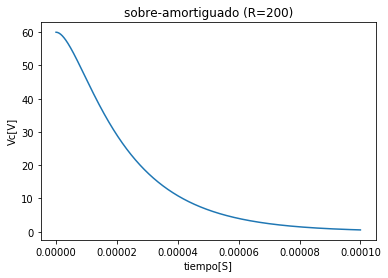

In [119]:

from scipy.integrate import odeint
import numpy as np


def ddVc(V, t):
    return [V[1], -250000*V[1] - 10e9*V[0]]
v0 = [60, 0]
t = np.linspace(0,0.0001, 2000)
sol = odeint(ddVc, v0, t)
vsol = sol[:,0]

plt.xlabel("tiempo[S]")
plt.ylabel("Vc[V]")
plt.title("sobre-amortiguado (R=200)")
plt.plot(t,vsol);


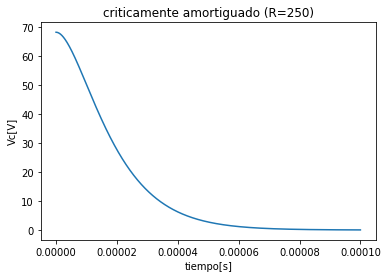

In [121]:
from scipy.integrate import odeint
import numpy as np


def ddVc(V, t):
    return [V[1], -200000*V[1] - 10e9*V[0]]
v0 = [68.181818, 0]
t = np.linspace(0,0.0001, 2000)
sol = odeint(ddVc, v0, t)
vsol = sol[:,0]

plt.xlabel("tiempo[s]")
plt.ylabel("Vc[V]")
plt.title("criticamente amortiguado (R=250)")
plt.plot(t,vsol);

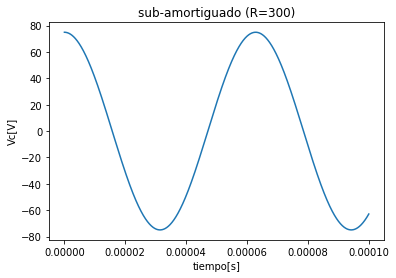

In [123]:
from scipy.integrate import odeint
import numpy as np


def ddVc(V, t):
    return [V[1], -166.66e-3*V[1] - 10e9*V[0]]
v0 = [75, 0]
t = np.linspace(0,0.0001, 2000)
sol = odeint(ddVc, v0, t)
vsol = sol[:,0]

plt.xlabel("tiempo[s]")
plt.ylabel("Vc[V]")
plt.title("sub-amortiguado (R=300)")
plt.plot(t,vsol);